**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercices in chapter 10._

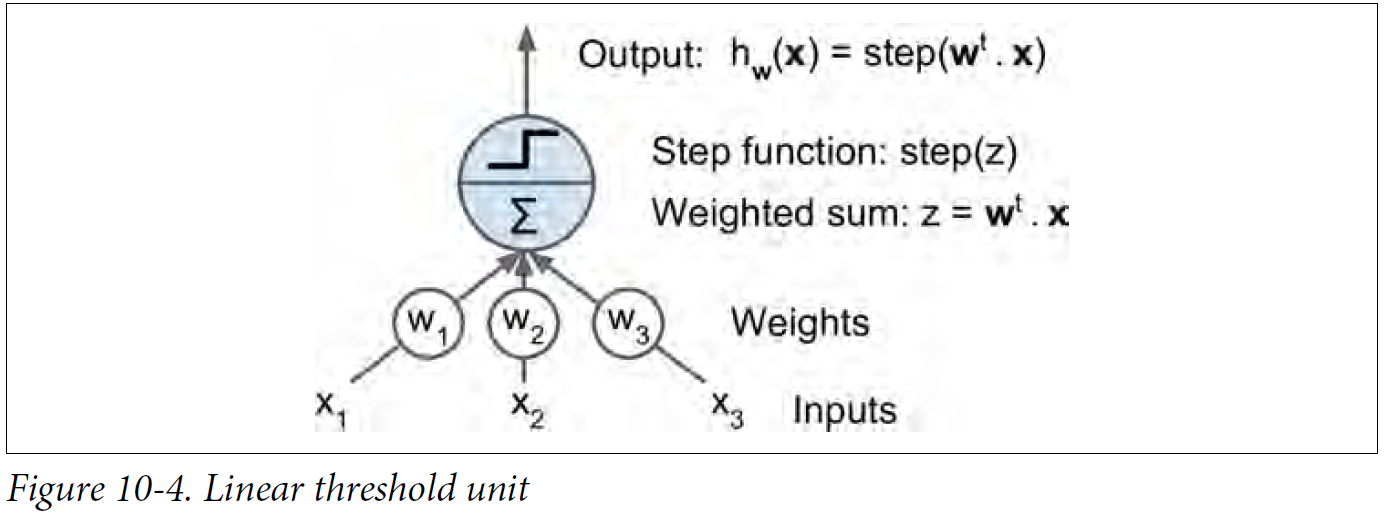

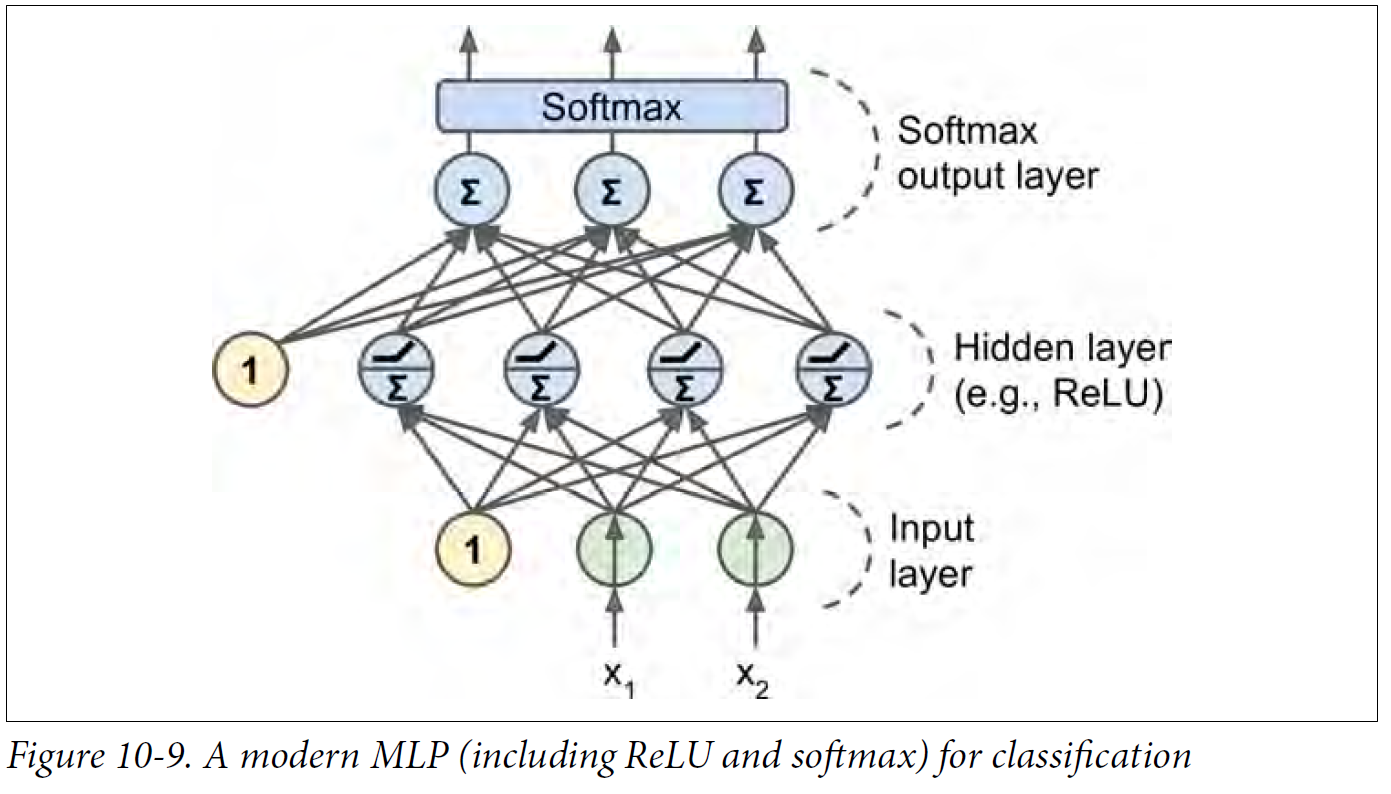

# Simple activation and learning rule

**Step functions used in Perceptrons**

$\qquad
\operatorname{Step}(z) =
\begin{cases}
0 & \text{if }z < 0\\
1 & \text{if }z \ge 0
\end{cases}
$

**Perceptron learning rule (weight update)**

$\qquad
{w_{i,j}}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$


**Weight initialization**

Weights are initialized randomly using a truncated normal (Gaussian) distribution with a standard deviation of $ 2 / \sqrt{\text{n}_\text{inputs}} $.

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# NOTES:
#  You should NOT run the code inside the Dropbox.
#  Create images/ann directory for the code to run.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
# Iris classification example using Perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

# Single LTU as shown in Fig. 1.
# Results in a single linear separation visualized below.
# Default: eta0=1
per_clf = Perceptron(random_state=42) # 1. Constructor
per_clf.fit(X, y)                     # 2. .fit() method

y_pred = per_clf.predict([[2, 0.5]])  # 3. .predict() method

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


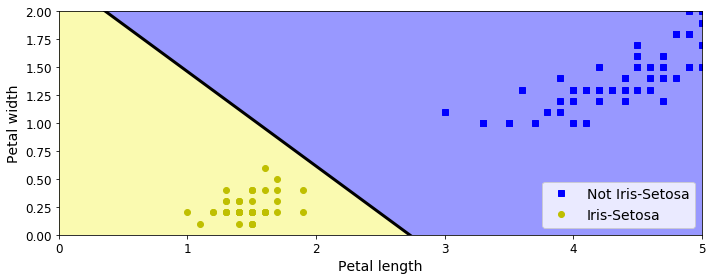

In [4]:
# Visualize classification using a single perceptron:
#  w_0 = coef_[0][0]  for x_0 (x-coordinate)
#  w_1 = coef_[0][1]  for x_1 (y-coordinate)
#  intercept = intercept_
#
# Start with CLASSIFICATION BOUNDARY:
#  w_0 *x + w_1 *y + c = 0
# Divide by w_1:
#  a*x + y + c/w_1 = 0
# Gives final form:
#  y = -a*x + b 
# for  b=-c/w_1

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
# Logistive regression:
def logit(z):
    return 1 / (1 + np.exp(-z))

# relu:
#    0 for negative values.
#    z with derivative=1 for positive values
def relu(z):
    return np.maximum(0, z)

# Derivative approximated using finite-differences:
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


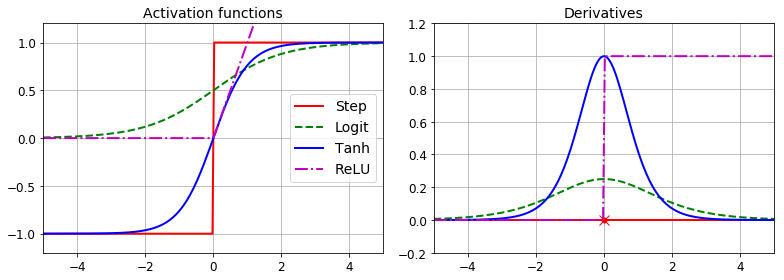

In [6]:
# Visualize the three activation functions and
# their derivatives.
# NOTE: Derivative must be non-zero for training.

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

# Solution to xor function using multiple activations:
def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

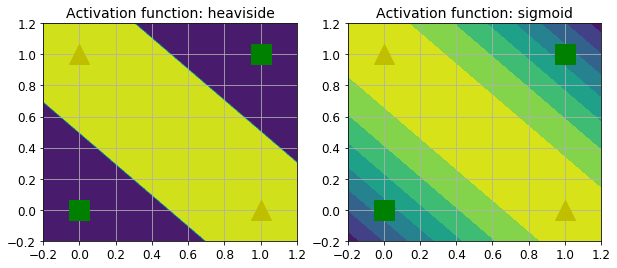

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [9]:
# Digits database example
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [11]:
# Deep Neural Nets defined as two or more layers!
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

# Inputs = feature_cols refer to pixel values as we covered earlier
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

# Deep Neural Net specification:
#  Inputs:   feature_columns=feature_cols
#            Using pixels now. 
#            COULD USE ANY OTHER FEATURES.
#
#  Outputs:  n_classes=10  for the ten digits
#            Default = Softmax layer.
#            YOU MUST CHANGE the output layer
#            if your activities can overlap.
#            THIS WILL NOT WORK WITH AOLME.
#
#  hidden:   first=300, second=100 
#            satisfy: first >> second
#            hidden_units = [300, 100]
#            Total number of layers = 4
#
#  Initialization:
#            config with REPRODUCIBLE random seed=42
#
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)

# Wrap-it inside Scikit-Learn classifier helper for compatibility
#   SK = Science Kit
#   Compat = provide compatibility.
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1

# .fit() rule as we did for Scikit-learn:
#   batch_size=50
#   number of iterations = 40,000
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F175B7CDA0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\MARIOS~1\\AppData\\Local\\Temp\\tmpzpua6_up'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create

INFO:tensorflow:global_step/sec: 366.175
INFO:tensorflow:loss = 0.0126797, step = 6901 (0.273 sec)
INFO:tensorflow:global_step/sec: 370.891
INFO:tensorflow:loss = 0.0166421, step = 7001 (0.271 sec)
INFO:tensorflow:global_step/sec: 365.622
INFO:tensorflow:loss = 0.00448675, step = 7101 (0.274 sec)
INFO:tensorflow:global_step/sec: 329.274
INFO:tensorflow:loss = 0.0508161, step = 7201 (0.303 sec)
INFO:tensorflow:global_step/sec: 346.467
INFO:tensorflow:loss = 0.00550252, step = 7301 (0.290 sec)
INFO:tensorflow:global_step/sec: 346.787
INFO:tensorflow:loss = 0.0154965, step = 7401 (0.287 sec)
INFO:tensorflow:global_step/sec: 353.026
INFO:tensorflow:loss = 0.004822, step = 7501 (0.283 sec)
INFO:tensorflow:global_step/sec: 349.118
INFO:tensorflow:loss = 0.0131625, step = 7601 (0.287 sec)
INFO:tensorflow:global_step/sec: 389.446
INFO:tensorflow:loss = 0.00680886, step = 7701 (0.257 sec)
INFO:tensorflow:global_step/sec: 388.445
INFO:tensorflow:loss = 0.00376618, step = 7801 (0.257 sec)
INFO:te

INFO:tensorflow:global_step/sec: 371.688
INFO:tensorflow:loss = 0.00242632, step = 15101 (0.268 sec)
INFO:tensorflow:global_step/sec: 371.702
INFO:tensorflow:loss = 0.00159225, step = 15201 (0.269 sec)
INFO:tensorflow:global_step/sec: 330.656
INFO:tensorflow:loss = 0.0014488, step = 15301 (0.302 sec)
INFO:tensorflow:global_step/sec: 338.625
INFO:tensorflow:loss = 0.00376972, step = 15401 (0.296 sec)
INFO:tensorflow:global_step/sec: 351.155
INFO:tensorflow:loss = 0.00406733, step = 15501 (0.285 sec)
INFO:tensorflow:global_step/sec: 332.796
INFO:tensorflow:loss = 0.00472252, step = 15601 (0.299 sec)
INFO:tensorflow:global_step/sec: 337.196
INFO:tensorflow:loss = 0.0146699, step = 15701 (0.297 sec)
INFO:tensorflow:global_step/sec: 345.53
INFO:tensorflow:loss = 0.00153426, step = 15801 (0.291 sec)
INFO:tensorflow:global_step/sec: 316.601
INFO:tensorflow:loss = 0.000447847, step = 15901 (0.314 sec)
INFO:tensorflow:global_step/sec: 341.181
INFO:tensorflow:loss = 0.00656253, step = 16001 (0.2

INFO:tensorflow:loss = 0.00217089, step = 23201 (0.297 sec)
INFO:tensorflow:global_step/sec: 380.789
INFO:tensorflow:loss = 0.00169613, step = 23301 (0.263 sec)
INFO:tensorflow:global_step/sec: 398.079
INFO:tensorflow:loss = 0.000720154, step = 23401 (0.251 sec)
INFO:tensorflow:global_step/sec: 387.558
INFO:tensorflow:loss = 0.000805685, step = 23501 (0.258 sec)
INFO:tensorflow:global_step/sec: 399.135
INFO:tensorflow:loss = 0.000631053, step = 23601 (0.251 sec)
INFO:tensorflow:global_step/sec: 394.657
INFO:tensorflow:loss = 0.000255326, step = 23701 (0.253 sec)
INFO:tensorflow:global_step/sec: 368.408
INFO:tensorflow:loss = 0.00180432, step = 23801 (0.272 sec)
INFO:tensorflow:global_step/sec: 374.227
INFO:tensorflow:loss = 0.000976085, step = 23901 (0.267 sec)
INFO:tensorflow:global_step/sec: 396.769
INFO:tensorflow:loss = 0.00113664, step = 24001 (0.252 sec)
INFO:tensorflow:global_step/sec: 368.426
INFO:tensorflow:loss = 0.000741892, step = 24101 (0.272 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.000460989, step = 31301 (0.270 sec)
INFO:tensorflow:global_step/sec: 382.618
INFO:tensorflow:loss = 0.000649023, step = 31401 (0.261 sec)
INFO:tensorflow:global_step/sec: 370.145
INFO:tensorflow:loss = 0.000197947, step = 31501 (0.270 sec)
INFO:tensorflow:global_step/sec: 358.231
INFO:tensorflow:loss = 6.59552e-05, step = 31601 (0.280 sec)
INFO:tensorflow:global_step/sec: 348.633
INFO:tensorflow:loss = 0.000625275, step = 31701 (0.286 sec)
INFO:tensorflow:global_step/sec: 338.76
INFO:tensorflow:loss = 9.4202e-05, step = 31801 (0.296 sec)
INFO:tensorflow:global_step/sec: 332.64
INFO:tensorflow:loss = 0.000756386, step = 31901 (0.301 sec)
INFO:tensorflow:global_step/sec: 338.607
INFO:tensorflow:loss = 0.000197061, step = 32001 (0.295 sec)
INFO:tensorflow:global_step/sec: 330.856
INFO:tensorflow:loss = 0.000425281, step = 32101 (0.302 sec)
INFO:tensorflow:global_step/sec: 353.927
INFO:tensorflow:loss = 0.00102074, step = 32201 (0.283 sec)
INFO:tensorflow:global_st

INFO:tensorflow:global_step/sec: 391.893
INFO:tensorflow:loss = 0.000639012, step = 39401 (0.255 sec)
INFO:tensorflow:global_step/sec: 395.753
INFO:tensorflow:loss = 0.000241011, step = 39501 (0.254 sec)
INFO:tensorflow:global_step/sec: 395.477
INFO:tensorflow:loss = 0.000744708, step = 39601 (0.252 sec)
INFO:tensorflow:global_step/sec: 331.391
INFO:tensorflow:loss = 0.000178735, step = 39701 (0.303 sec)
INFO:tensorflow:global_step/sec: 354.127
INFO:tensorflow:loss = 0.00115475, step = 39801 (0.281 sec)
INFO:tensorflow:global_step/sec: 408.729
INFO:tensorflow:loss = 0.00126455, step = 39901 (0.245 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\MARIOS~1\AppData\Local\Temp\tmpzpua6_up\model.ckpt.
INFO:tensorflow:Loss for final step: 0.000402969.


SKCompat()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\MARIOS~1\AppData\Local\Temp\tmpzpua6_up\model.ckpt-40000


0.98209999999999997

In [13]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.071960262984114065

## Using plain TensorFlow

In [14]:
# FULL CONTROL USING TENSOR FLOW

import tensorflow as tf

# Four layers:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
# 1. reset_graph()
reset_graph()

# 2. Input layer specification
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

# 3. Output layer specification
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [16]:
# Specify a hidden layer:
#  activation:  look at earlier functions.

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        # Weight initialization:
        #  Specify truncated_normal with
        #  sigma = 2/sqrt(Number-of-inputs)
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Weights
        W = tf.Variable(init, name="kernel")
        
        # Bias
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        #  W^T * X + b
        Z = tf.matmul(X, W) + b
        
        # Process the output through the activation:
        #  default IS NOT RELU!
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
# Create Deep Neural Net with fine control ...
#  Note the pipelining:
#    X -> hidden1 -> hidden2 -> logits
with tf.name_scope("dnn"):
    # First hidden layer: 
    #    Process X using relu
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    
    # Second hidden layer:
    #     Process hidden1 using relu
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    
    # INCOMPLETE output classification right now:
    #  will need to train softmax() in the next step.
    #  NOTE: activation=z, the default which does nothing.
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [18]:
# FINAL layer setup:
#   Use sofmax cross-entropy for MUTUALLY-EXCLUSIVE classes
with tf.name_scope("loss"):
    # FOR EACH instance, compute the cross-entropy:
    #   Note that this layer is part of the Neural-Net
    #   since it is specified using tf.nn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    # FOR ALL instances, use reduce_mean() for total loss:
    #    Outside the Neural-Net constructor, define
    #    tf.reduce_mean() that applies to all entries.
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
# OPTIMIZATION:
#   Gradient Descent
learning_rate = 0.01
with tf.name_scope("train"):
    # optimizer is a function built with learning_rate
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    
    # training_op is a function based on the total loss
    # for all instances
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    # correct is part of the neural-net class
    # constructor.
    #  correct tensor entry
    #     =true   if y-values is the top one.
    #     =false  otherwise
    correct = tf.nn.in_top_k(logits, y, 1)
    
    # Constructor for accuracy class:
    #  cast boolean as float32 and average.
    #  accuracy.eval() is used to apply the function.
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:
# Initialize X and y
init = tf.global_variables_initializer()

# Build saver
saver = tf.train.Saver()

In [22]:
# Repeat 40 times for training
n_epochs = 40

# Process 50 elements of X and y at a time.
batch_size = 50

In [23]:
# NOTE: The following code will not run in the Dropbox.
# https://github.com/tensorflow/tensorflow/issues/9090

with tf.Session() as sess:
    # Initialize everything
    init.run()
    
    # 40 epochs
    for epoch in range(n_epochs):
        # Use // to take the floor of the division:
        #   4//3 = 1  and 5//2=2
        num_examples = mnist.train.num_examples // batch_size
        for iteration in range(num_examples):
            # Grab batch_size:
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            # Apply training_op() using the batch to minimize loss
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        # NOTE:
        #  Confirmed that ONLY THE LAST batch is used for achieved training accuracy.
        #   This makes sense since accuracy GENERALLY improves for each epoch and
        #   each iteration.
        #  However, sometimes accuracy can go down also.
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        
        # Evaluate error over entire test set:
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
    # Save the final model:
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9128
1 Train accuracy: 0.94 Test accuracy: 0.9291
2 Train accuracy: 0.92 Test accuracy: 0.9398
3 Train accuracy: 0.96 Test accuracy: 0.9449
4 Train accuracy: 0.92 Test accuracy: 0.9511
5 Train accuracy: 0.94 Test accuracy: 0.9542
6 Train accuracy: 0.98 Test accuracy: 0.9556
7 Train accuracy: 0.96 Test accuracy: 0.9594
8 Train accuracy: 0.92 Test accuracy: 0.9627
9 Train accuracy: 0.96 Test accuracy: 0.9647
10 Train accuracy: 0.98 Test accuracy: 0.965
11 Train accuracy: 0.94 Test accuracy: 0.9669
12 Train accuracy: 1.0 Test accuracy: 0.969
13 Train accuracy: 0.94 Test accuracy: 0.9684
14 Train accuracy: 1.0 Test accuracy: 0.9699
15 Train accuracy: 1.0 Test accuracy: 0.9714
16 Train accuracy: 1.0 Test accuracy: 0.9713
17 Train accuracy: 0.98 Test accuracy: 0.9714
18 Train accuracy: 1.0 Test accuracy: 0.973
19 Train accuracy: 1.0 Test accuracy: 0.9731
20 Train accuracy: 0.98 Test accuracy: 0.9736
21 Train accuracy: 1.0 Test accuracy: 0.974
22 Train a

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    
    # Extract the first 20 images from the test set:
    X_new_scaled = mnist.test.images[:20]
    
    # For each image or singlw row in X_new_scaled:
    #   Compute the output for all 10 digit outputs:
    Z = logits.eval(feed_dict={X: X_new_scaled})
    
    # Take the maximum of each output:
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [25]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [26]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [53]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [28]:
# Rebuild using .dense()
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [30]:
# Build Neural Net as before, but with less control.
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [31]:
# Build final layer as before
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
# Build optimizer as before
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
# Build accuracy as before
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
# Results are similar as before

n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9053
1 Train accuracy: 0.88 Test accuracy: 0.9207
2 Train accuracy: 0.94 Test accuracy: 0.9299
3 Train accuracy: 0.94 Test accuracy: 0.9399
4 Train accuracy: 0.92 Test accuracy: 0.9452
5 Train accuracy: 0.94 Test accuracy: 0.9475
6 Train accuracy: 0.92 Test accuracy: 0.9516
7 Train accuracy: 0.98 Test accuracy: 0.9547
8 Train accuracy: 0.96 Test accuracy: 0.9569
9 Train accuracy: 0.94 Test accuracy: 0.9605
10 Train accuracy: 0.92 Test accuracy: 0.9619
11 Train accuracy: 0.96 Test accuracy: 0.9631
12 Train accuracy: 1.0 Test accuracy: 0.9659
13 Train accuracy: 0.94 Test accuracy: 0.9657
14 Train accuracy: 1.0 Test accuracy: 0.9669
15 Train accuracy: 0.94 Test accuracy: 0.9682
16 Train accuracy: 0.96 Test accuracy: 0.9701
17 Train accuracy: 0.98 Test accuracy: 0.9696
18 Train accuracy: 1.0 Test accuracy: 0.9699
19 Train accuracy: 1.0 Test accuracy: 0.9709


In [36]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [37]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [39]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [40]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [41]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [42]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [44]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [45]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [46]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's `input_data()` function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define `X_valid` and `y_valid`:

In [47]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [48]:
m, n = X_train.shape

In [49]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50  # EARLY STOPPING if no improvement after 50.

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        
        # Every 5 epochs, check accuracy:
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            
            # Save the current results:
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                # UPDATE the best model and loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                # NO IMPROVEMENT
                epochs_without_progress += 5
                
                # STOP if too many epochs without improvement:
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.440% 	Loss: 0.35228
Epoch: 5 	Validation accuracy: 95.060% 	Loss: 0.17543
Epoch: 10 	Validation accuracy: 96.660% 	Loss: 0.12545
Epoch: 15 	Validation accuracy: 97.240% 	Loss: 0.10428
Epoch: 20 	Validation accuracy: 97.580% 	Loss: 0.08914
Epoch: 25 	Validation accuracy: 97.720% 	Loss: 0.08118
Epoch: 30 	Validation accuracy: 97.780% 	Loss: 0.07794
Epoch: 35 	Validation accuracy: 97.920% 	Loss: 0.07091
Epoch: 40 	Validation accuracy: 97.920% 	Loss: 0.06981
Epoch: 45 	Validation accuracy: 97.860% 	Loss: 0.06782
Epoch: 50 	Validation accuracy: 98.060% 	Loss: 0.06648
Epoch: 55 	Validation accuracy: 98.100% 	Loss: 0.06650
Epoch: 60 	Validation accuracy: 98.200% 	Loss: 0.06508
Epoch: 65 	Validation accuracy: 98.100% 	Loss: 0.06590
Epoch: 70 	Validation accuracy: 98.120% 	Loss: 0.06754
Epoch: 75 	Validation accuracy: 98.160% 	Loss: 0.06702
Epoch: 80 	Validation accuracy: 98.140% 	Loss: 0.06701
Epoch: 85 	Validation accuracy: 98.180% 	Loss: 0.06711
Epoch: 90 	V

In [50]:
os.remove(checkpoint_epoch_path)

In [51]:
# RESTORE the best model with EARLY STOPPING:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [52]:
accuracy_val

0.97829998